In [1]:
import pandas as pd
data = pd.read_csv("lsd_math_score_data.csv")

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score
0,5,1.17,78.93
1,15,2.97,58.20
2,30,3.26,67.47
3,60,4.69,37.47
4,120,5.83,45.65
5,240,6.00,32.92
6,480,6.41,29.97


In [5]:
time = data[["Time_Delay_in_Minutes"]]
LSD = data[["LSD_ppm"]]
score = data[["Avg_Math_Test_Score"]]

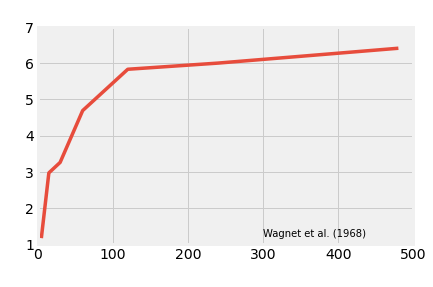

In [35]:
%matplotlib inline

plt.title("Tissue Concentration of LSD Over Time", fontsize = 17)
plt.xlabel("Time in Minutes", fontsize = 14)
plt.ylabel("LSD concentration in PPM", fontsize = 14)
plt.text (x=300, y=1.2, s="Wagnet et al. (1968)", color = "black")
plt.xticks(fontsize = 14, color="black")
plt.yticks(fontsize = 14, color="black")

plt.ylim(1,7)
plt.xlim(0,500)

plt.plot(time, LSD, color = "#e74c3c", linewidth = 3.5)
plt.show()



In [25]:
regr = LinearRegression()
regr.fit(LSD, score)
print("Theta 1   : ", regr.coef_[0][0])
print("Intercept : ", regr.intercept_[0])
print("R-Square  : ", regr.score(LSD, score))
predicted_score = regr.predict(LSD)

Theta 1   :  -9.009466415296785
Intercept :  89.12387376799308
R-Square  :  0.8778349707775889


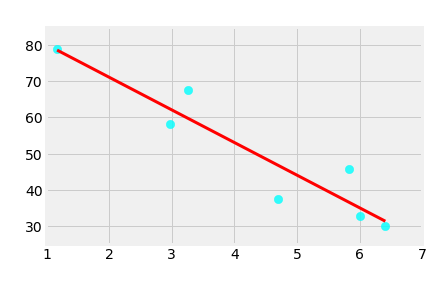

In [37]:
%matplotlib inline

plt.title("Arithmetic vs LSD-25", fontsize = 17)
plt.xlabel("Tissue LSD ppm", fontsize = 14)
plt.ylabel("Performance Score", fontsize = 14)
plt.xlim(1,7)
plt.ylim(25,85)
plt.style.use("fivethirtyeight")
plt.xticks(fontsize = 14, color="black")
plt.yticks(fontsize = 14, color="black")
#plt.style.use("dark_background")

plt.scatter(LSD, score, color = "cyan",s= 70, alpha = 0.8 )
plt.plot(LSD, predicted_score, color="red", linewidth=3)
plt.show()

In [19]:
LSD_ratio = float(input("LSd concentration in blood as ppm: \n(0-7 ppm)"))
sum = ((regr.intercept_[0]) + (regr.coef_[0][0] * LSD_ratio))
print(f"LSD-25 ratio in blood is {LSD_ratio} ppm.")
print("Your estimates score is:",round(sum,2),"%")

LSd concentration in blood as ppm: 
(0-7 ppm)5
LSD-25 ratio in blood is 5.0 ppm.
Your estimates score is: 44.08 %
